# Motor DC (theory)

DC motors convert electrical energy into mechanical torque and rotational motion. The fundamental equations are:

- Torque generated: 
  
   $$ 
  \tau = k_t \cdot I
   $$ 

- Voltage across the motor:  

   $$ 
  V = k_e \cdot \omega + I \cdot R
   $$ 


Where:
- $\tau$: torque (N·m)  
- $I$: current (A)  
- $V$: voltage (V)  
- $\omega$: angular velocity (rad/s)  
- $k_t$: torque constant (N·m/A)  
- $k_e$: back-EMF constant (V·s/rad)  
- $R$: motor coil resistance (Ω)

**DC motor model**

![DC motor diagrams](img/dcmotor.png)

Parameter

- `va` - Applied Voltage
- `R` - Resistance
- `L` - Inductance
- `i` - Current
- `b` - Damping coefficient
- `J` - Rotor Inertia
- `ke` - Back EMF constant
- `kt` - Torque constant
- `θ` - Rotor shaft angle


**Typical Parameters for steady-state**

To correctly simulate and use a DC motor in a control system, you must know or estimate the following key parameters:

| Symbol      | Quantity                 | Units        | Typical Range (Lab Motors) |
|-------------|--------------------------|--------------|----------------------------|
| $\tau$      | Torque                   | N·m          | 0.01 – 0.2 N·m             |
| $I$         | Current                  | A            | 0.2 – 2 A                  |
| $V$         | Voltage                  | V            | 3 – 24 V                   |
| $\omega$    | Angular speed            | rad/s        | 100 – 2000 rad/s           |
| $k_t$       | Torque constant          | N·m/A        | 0.01 – 0.1 N·m/A           |
| $k_e$       | Back-EMF constant        | V·s/rad      | 0.01 – 0.1 V·s/rad         |
| $R$         | Coil resistance          | Ω            | 0.5 – 10 Ω                 |


Most of these values are provided in the motor's datasheet:

- **$k_t$** and **$k_e$**: Often given directly. For brushed motors, these are numerically equal ($k_t = k_e$) if using SI units.
- **Stall torque** ($\tau_{\text{stall}}$): Maximum torque at zero speed.
- **No-load speed** ($\omega_{\text{free}}$): Speed at zero torque.
- **Stall current** ($I_{\text{stall}}$): Current at zero speed and maximum torque.
- **Resistance**: $R = V_{\text{stall}} / I_{\text{stall}}$

From these, you can compute:
- $k_t = \tau_{\text{stall}} / I_{\text{stall}}$
- $k_e = V_{\text{free}} / \omega_{\text{free}}$
  
**Trade-Offs in Motor Selection**

The performance of a DC motor is a balance between torque and speed. Key considerations:
- Higher torque → requires more current.
- Higher speed → increases back-EMF and voltage needs.
- Higher current → increases resistive losses ($I^2 R$) and risk of overheating.
- Motor constants ($k_t$, $k_e$) are typically fixed for a given model.

>  Always respect **maximum ratings**: exceeding current, voltage, or power may permanently damage the motor.



**Dynamical model**

Electrical part

&emsp; $va = R i + L \frac{di}{dt} + k_e \frac{dθ}{dt}$

Electromechanical Conversion

&emsp; $T_{m} = k_t i$

Mechanical Part (inertia plus load)

&emsp; $T_{m} = b \frac{dθ}{dt} + J\frac{d^2θ}{dt^2}$

If required, mechanical part can also include Coulomb (static) or Reynolds (aerodynamic) friction



**DC motor - regime estacionário**

There are two time constants associated to DC motors in the second order model: 

- the electrical time constant $tau_{el}=L/R$, of order 0.1 ms
- the mechanical time constant $tau_{mech}=J/B$, of order 100 ms

In many if not most control projects, a stationary (steady state) model is adequate.   

By zeroing the time variations (dynamic derivatives):

$$ L \frac{di}{dt}=0 $$

$$ J\frac{dω}{dt}=0 $$

The electrical part becomes

$$ va = R i + k_e ω $$

The mechanical part becomes

$$ T_{m} = k_t i $$

A typical (minimal) load: 

$$ T_{m} = b ω $$

**Speed-voltage transfer curve**

$$ va = R \frac{b ω}{k_t} + k_e ω = (1+\frac{Rb}{k_e k_t}) k_e ω $$

$$ \boxed{ ω = \frac{va}{(1+\frac{Rb}{k_e k_t}) k_e}}$$

This linear correlation between speed $\omega$ and applied Voltage $va$ is called the **speed-voltage transfer curve**.

For a given motor, the proportionality constant is given by $$\frac{1}{(1+\frac{R b}{k_e k_t})k_e}$$



1165.5011655011656


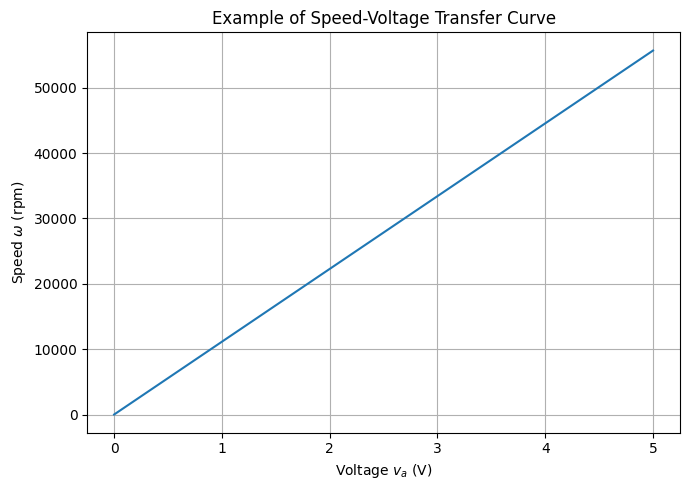

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Voltage range
va = np.linspace(0, 5, 100)

# Electrical & mechanical parameters (typical/representative)
R  = 2.7e0      # Armature resistance [ohm]
B  = 3.0e-8     # Viscous damping coeff. [N·m·s/rad]
ke = 7.5e-4     # Back-EMF constant [V·s/rad]  (== V/(rad/s))
kt = 7.5e-4     # Torque constant [N·m/A]      (≈ ke in SI)

# Speed-voltage static transfer curve
propconst= 1 / ((1 + (R * B) / (ke * kt)) * ke)
print('propconst)
omega =  propconst*va 

plt.figure(figsize=(7, 5))
plt.plot(va, omega*60/6.28)
plt.xlabel('Voltage $v_a$ (V)')
plt.ylabel('Speed $\\omega$ (rpm)')
plt.title('Example of Speed-Voltage Transfer Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


**Speed-Torque Curve (load line)**

$$ T_{m} =  \frac{k_t}{R} (va-k_e ω) $$

$$ \boxed{ω = \frac{va}{k_e}-\frac{R}{k_e k_t}T_m} $$

This linear inverse correlation between speed $\omega$ and torque $T_m$ is called the **load line**.

For a given motor:

- the slope $-\frac{R}{k_e k_t}$ is constant.
  
- the vertical offset $\frac{va}{k_e}$ is proportional to the applied Voltage 


Load line reference points:

Maximum speed at zero load and torque:

$$ ω(T_m=0) = \frac{va}{k_e} = ω_{max} $$

Maximum torque at full load and zero speed:

$$ T_m(ω=0) = \frac{k_t}{R} va = k_t I_{stall}= Tm_{max} $$


The point of maximum energy transfer is in the center point of the load line: 

$$ P_{max} = \frac{ω_{max}} {2} \frac{Tm_{max}} {2} $$


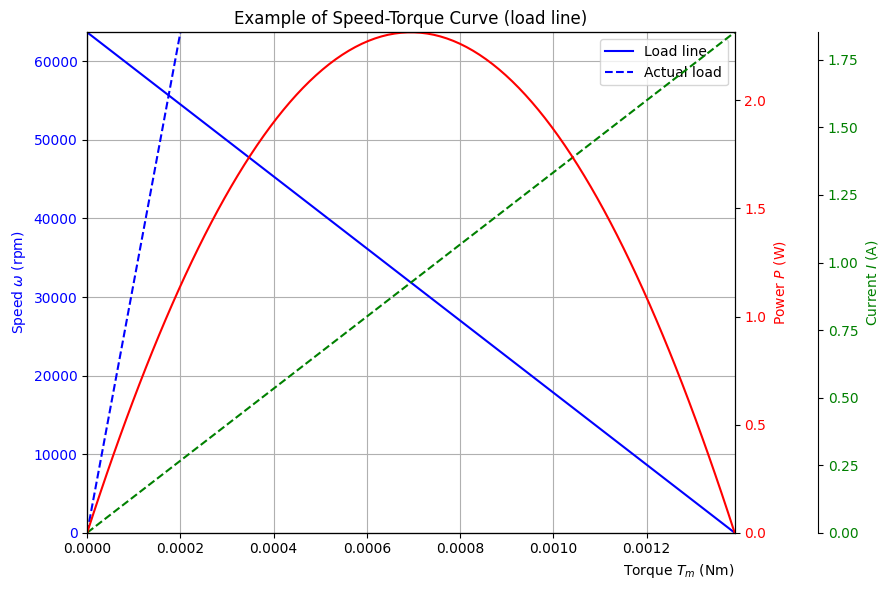

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
va = 5            #applied voltage

# Torque range
Tm = np.linspace(0,kt*va/R , 100)

# Electrical & mechanical parameters (typical/representative)
R  = 2.7e0      # Armature resistance [ohm]
B  = 3.0e-8     # Viscous damping coeff. [N·m·s/rad]
ke = 7.5e-4     # Back-EMF constant [V·s/rad]  (== V/(rad/s))
kt = 7.5e-4     # Torque constant [N·m/A]      (≈ ke in SI)

# Speed-torque curve
omega = va/ke - R / (ke * kt) * Tm

# Current curve
Im=Tm/kt

# Power curve
P = omega * Tm

# Set axis limits
x_min, x_max = Tm.min(), Tm.max()
y_min, y_max = omega.min()*60/6.28, omega.max()*60/6.28
p_min, p_max = P.min(), P.max()
I_min, I_max = Im.min(), Im.max()

fig, ax1 = plt.subplots(figsize=(9, 6))

# Main plot: Torque vs Speed
ax1.plot(Tm, omega*60/6.28, label='Load line', color='b')
ax1.plot(Tm, Tm/B*60/6.28, label='Actual load', color='b', linestyle='--')
ax1.set_ylabel('Speed $\\omega$ (rpm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlabel('Torque $T_m$ (Nm)', loc='right')
ax1.xaxis.set_label_position('bottom')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('outward', 0))
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Additional y-axis for Current
ax3 = ax1.twinx()
ax3.plot(Tm, Im, label='Current', color='g', linestyle='--')
ax3.spines['right'].set_position(('outward', 60))
ax3.yaxis.set_label_position('right')
ax3.yaxis.set_ticks_position('right')
ax3.set_ylim(ax1.get_ylim())
#omega_ticks = ax1.get_yticks()
#ax3.set_yticks(omega_ticks)
#ax3.set_yticklabels([f"{(ke*tick/(60/6.28) ):.1f}" for tick in omega_ticks])
ax3.set_ylabel('Current $I$ (A)', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.set_ylim(I_min, I_max)  # restrict power axis to min/max

# Additional y-axis for Power
ax4 = ax1.twinx()
ax4.plot(Tm, P, label='Power', color='r')
ax4.set_ylabel('Power $P$ (W)', color='r')
ax4.tick_params(axis='y', labelcolor='r')
ax4.set_ylim(p_min, p_max)  # restrict power axis to min/max

# Grid on both x and y axes
ax1.grid(True, which='both', axis='both')
ax1.legend()
#ax4.legend()
plt.title('Example of Speed-Torque Curve (load line)')
plt.tight_layout()
plt.show()




**Gears**

Gears can be used to **adapt motor output** to desired speed and torque levels.

**Basic Gear Equations**

- Gear ratio:  

   $$ 
  R = \frac{N_{\text{out}}}{N_{\text{in}}}
   $$ 

  where $N$ is the number of teeth or diameter.

- Output torque:  
  
   $$ 
  \tau_{\text{out}} = R \cdot \tau_{\text{in}}
   $$ 


- Output speed: 
  
   $$ 
  \omega_{\text{out}} = \frac{\omega_{\text{in}}}{R}
   $$ 


**Why Use Gears?**

- **Increase torque** at the cost of lower speed.
- **Reduce load** on the motor to avoid overheating.
- **Match the dynamics** of the controlled system (e.g. pendulum).

**Pulleys (with belts)** provide similar mechanical advantages as gears.They are quieter than gears, and the distance between shafts is more flexible, so systems with pulleys and belts are more simple to design and align. At the same time, they are less precise (risk of belt slippage), and limited to moderate torque applications.

**Numerical Example: Gear Matching**

Suppose your pendulum needs:
- Torque of $0.1$ N·m
- Speed around $30$ rad/s

But your available motor produces:
- Torque of $0.02$ N·m
- Speed of $150$ rad/s

Then use a gear ratio of:

 $$ 
R = \frac{0.1}{0.02} = 5
 $$ 

This brings output torque up to $0.1$ N·m, and reduces speed to:

 $$ 
\omega_{\text{out}} = \frac{150}{5} = 30 \ \text{rad/s}
 $$ 

